By Jonathan Jermstad (9/26/2024)

In [1]:
import sympy as sy

import IPython
from IPython.display import display

import matplotlib.pyplot as plt

import numpy as np

from scipy.integrate import odeint

def displayH(a1,a2='', a3='', a4='', a5='', a6='', a7='',):
    latex_a1 = sy.latex(a1)
    latex_a2 = sy.latex(a2)
    latex_a3 = sy.latex(a3)
    latex_a4 = sy.latex(a4)
    latex_a5 = sy.latex(a5)
    latex_a6 = sy.latex(a6)
    latex_a7 = sy.latex(a7)
    display( IPython.core.display.Math(latex_a1 + latex_a2 + latex_a3 + latex_a4 + latex_a5 + latex_a6 + latex_a7)  )

$\newpage$

### 1. Torque-free motion of symmetric bodies

Consider a completely symmetric body with a principal moment of inertia matrix,
$$
[I]_c = \left[\begin{array}{ccc}
I_{s} & 0 & 0 \\
0 & I_{s} & 0 \\
0 & 0 & I_{s} \\
\end{array}\right]
$$
Given initial conditions
$$
\vec{\omega}(t_{0}) = \left[\begin{array}{ccc}
\omega_{1}(t_{0}) \\
\omega_{2}(t_{0}) \\
\omega_{3}(t_{0}) \\
\end{array}\right]
$$
Complete the following tasks:

#### (a) Starting with the torque-free Euler’s rotational equations of motion, derive the analytical expressions for the angular velocity components $\omega_{1}(t)$, $\omega_{2}(t)$, and $\omega_{3}(t)$.

##### Solution:

$$
\begin{array}{c}
I_s  \dot{\omega}_{1} = (I_{s}-I_{s})\omega_{2}\omega_{3} = 0 \\
I_s  \dot{\omega}_{2} = (I_{s}-I_{s})\omega_{3}\omega_{1} = 0 \\
I_s  \dot{\omega}_{3} = (I_{s}-I_{s})\omega_{1}\omega_{2} = 0
\end{array}
$$

$$
\begin{array}{c}
\omega_{1}(t) = \omega_{1}(t_{0}) \\
\omega_{2}(t) = \omega_{2}(t_{0}) \\
\omega_{3}(t) = \omega_{3}(t_{0})
\end{array}
$$

#### (b) Comment on the behavior of the angular velocity vector $\vec{\omega}(t)$ for time $t > t_0$ for the torque-free motion of symmetric bodies.

##### Solution:

In torque-free motion of symmetric bodies, the behavior of the angular velocity vector is that it remains constant for time $t > t_0$.

### 2. Torque-free motion of axi-symmetric bodies.
In the absence of external torque, the Euler’s equations of motion for an axi-symmetric body with the principal moment of inertia matrix:

$$
I = \left[\begin{array}{ccc}
I_{T} & 0 & 0 \\
0 & I_{T} & 0 \\
0 & 0 & I_{3} \\
\end{array}\right]
$$

are given by:

$$
\begin{array}{c}
I_T  \dot{\omega}_{1} = (I_{T}-I_{3})\omega_{2}\omega_{3} \\
I_T  \dot{\omega}_{2} = (I_{3}-I_{T})\omega_{3}\omega_{1} \\
I_3  \dot{\omega}_{3} = 0
\end{array}
$$

The closed-form analytic solutions for these equations are:

$$
\begin{array}{c}
\omega_{1}(t) = \omega_{1}(0)cos(\lambda t)+ \frac{\dot{\omega}_{1}(0)}{\lambda}  sin (\lambda t) \\
\omega_{2}(t) = \omega_{2}(0)cos(\lambda t)+ \frac{\dot{\omega}_{2}(0)}{\lambda}  sin (\lambda t) \\
\omega_{3}(t) = \omega_{3}(0)
\end{array}
$$
where,
$$
\begin{array}{c}
n = \omega_{3} \\
\lambda  = \frac{n(I_{3} − I_{T})}{I_{T}} \\
\dot{\omega}_{1} = −\lambda \omega_2 \\
\dot{\omega}_{2} = \lambda \omega_1
\end{array}
$$
Given:

$$
I = \left[\begin{array}{ccc}
I_{T} & 0 & 0 \\
0 & I_{T} & 0 \\
0 & 0 & I_{3} \\
\end{array}\right] =
\left[\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 5 \\
\end{array}\right]
[km \cdot m^2]
$$

$$
\vec{\omega}(0) =\left[\begin{array}{ccc}
\omega_1(0) \\
\omega_2(0) \\
\omega_3(0) \\
\end{array}\right] = 
\left[\begin{array}{ccc}
0.01 \\
0.02 \\
0.03 \\
\end{array}\right]
[rad/sec]
$$

Perform the following tasks,

$\newpage$

#### (a) Find the exact values of $\vec{\omega}(t)$ over the time interval t = (0, 0.1, 0.2, . . . 500) secs using the closed-form analytic solutions. Plot these values

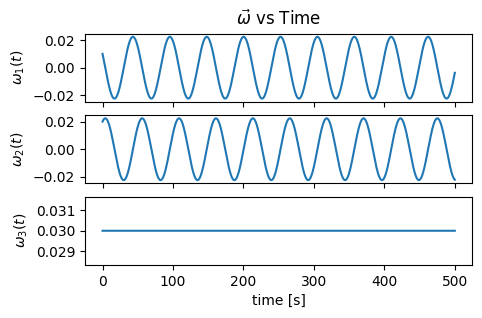

In [2]:
times = np.arange(0,500,0.1)
I = np.array([[1,0,0],
              [0,1,0],
              [0,0,5]])
w0 = np.array([0.01,0.02,0.03])
l = w0[2]*(I[2,2]-I[0,0])/I[0,0]
dw0 = np.array([-l*w0[1],l*w0[0],0])
w_exact = np.array([[w0[0]*np.cos(l*t)+dw0[0]/l*np.sin(l*t) for t in times],
                    [w0[1]*np.cos(l*t)+dw0[1]/l*np.sin(l*t) for t in times],
                    [w0[2] for t in times]])

fig,axes = plt.subplots(3,sharex=True,figsize=(5,3))
axes[0].set_title(r"$\vec{\omega}$ vs Time")
for idx in range(3):
    axes[idx].plot(times,w_exact[idx])
axes[0].set_ylabel(r"$\omega_{1}(t)$")
axes[1].set_ylabel(r"$\omega_{2}(t)$")
axes[2].set_ylabel(r"$\omega_{3}(t)$")
axes[2].set_xlabel("time [s]")
plt.show()

#### (b) on the same time interval, numerically integrate the Euler’s equations using MATLAB’s ”ode45”  function (or equivalent integration packages in other software) to obtain the numerically integrated values of $\vec{\omega}(t)$. Plot these values.

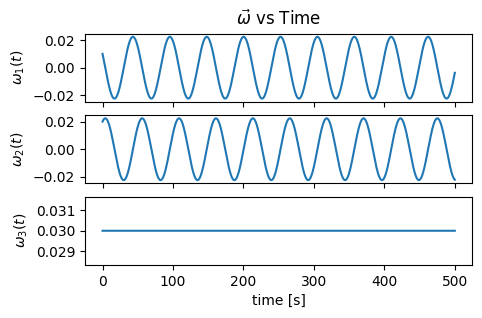

In [3]:
def EOM(x,t):
    return np.array([-l*x[1],l*x[0],0])

tol = 10**-12

w_numerical = odeint(EOM,w0,times,rtol=tol,atol=tol).T

fig,axes = plt.subplots(3,sharex=True,figsize=(5,3))
axes[0].set_title(r"$\vec{\omega}$ vs Time")
for idx in range(3):
    axes[idx].plot(times,w_numerical[idx])
axes[0].set_ylabel(r"$\omega_{1}(t)$")
axes[1].set_ylabel(r"$\omega_{2}(t)$")
axes[2].set_ylabel(r"$\omega_{3}(t)$")
axes[2].set_xlabel("time [s]")
plt.show()

$\newpage$

#### (c) Compute the absolute error between the exact solutions and the numerically integrated solutions as follows: $$\begin{array}{ccc} \Delta \omega_{1}(t) = \|\omega_{1_{num}} − \omega_{1_{exact}}\| \\ \Delta \omega_{2}(t) = \|\omega_{2_{num}} − \omega_{2_{exact}} \| \\ \Delta \omega_{3}(t) = \|\omega_{3_{num}} − \omega_{3_{exact}} \|\end{array}$$ Plot the three errors. Does your analytic solution agree with your numerically integrated solution?

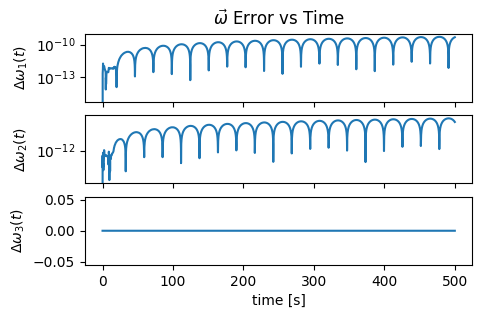

In [4]:
fig,axes = plt.subplots(3,sharex=True,figsize=(5,3))
axes[0].set_title(r"$\vec{\omega}$ Error vs Time")
for idx in range(3):
    axes[idx].plot(times,np.abs(w_exact[idx]-w_numerical[idx]))
axes[0].set_ylabel(r"$\Delta \omega_{1}(t)$")
axes[1].set_ylabel(r"$\Delta \omega_{2}(t)$")
axes[2].set_ylabel(r"$\Delta \omega_{3}(t)$")
axes[2].set_xlabel("time [s]")
axes[0].set_yscale('log')
axes[1].set_yscale('log')
plt.show()

These errors show that the numerical solution does align with the analytical solution, as the error is extremely small. 

$\newpage$

### 3. General torque-free rigid body motion.
In the absence of external torque, Euler’s rotational equations of motion, when ex-
pressed in a body-fixed frame aligned with the principal axes, simplify to:
$$
\begin{array}{c}
I_1  \dot{\omega}_{1} = (I_{2}-I_{3})\omega_{2}\omega_{3} \\
I_2  \dot{\omega}_{2} = (I_{3}-I_{1})\omega_{3}\omega_{1} \\
I_3  \dot{\omega}_{3} = (I_{1}-I_{3})\omega_{1}\omega_{2} \\
\end{array}
$$
Given:

$$I = \left[\begin{array}{ccc}
I_{1} & 0 & 0 \\
0 & I_{2} & 0 \\
0 & 0 & I_{3} \\
\end{array}\right] =
\left[\begin{array}{ccc}
15 & 0 & 0 \\
0 & 10 & 0 \\
0 & 0 & 5 \\
\end{array}\right]
[km \cdot m^2]
$$

$$\vec{\omega}_{1}(0) =\left[\begin{array}{ccc}
\omega_1(0) \\
\omega_2(0) \\
\omega_3(0) \\
\end{array}\right] = 
\left[\begin{array}{ccc}
0.01 \\
10^{-10} \\
10^{-10} \\
\end{array}\right]
[rad/sec]
$$

$$\vec{\omega}_{2}(0) =\left[\begin{array}{ccc}
\omega_1(0) \\
\omega_2(0) \\
\omega_3(0) \\
\end{array}\right] = 
\left[\begin{array}{ccc}
10^{-10} \\
0.01 \\
10^{-10} \\
\end{array}\right]
[rad/sec]
$$

$$\vec{\omega}_{3}(0) =\left[\begin{array}{ccc}
\omega_1(0) \\
\omega_2(0) \\
\omega_3(0) \\
\end{array}\right] = 
\left[\begin{array}{ccc}
10^{-10} \\
10^{-10} \\
0.01 \\
\end{array}\right]
[rad/sec]
$$

Perform the following tasks,

$\newpage$

#### (a) Plot $\vec{\omega}_{1}(t)$, $\vec{\omega}_{2}(t)$, and $\vec{\omega}_{3}(t)$ over the time interval t = (0, 0.1, 0.2, . . . 5000) for all three sets of initial conditions.

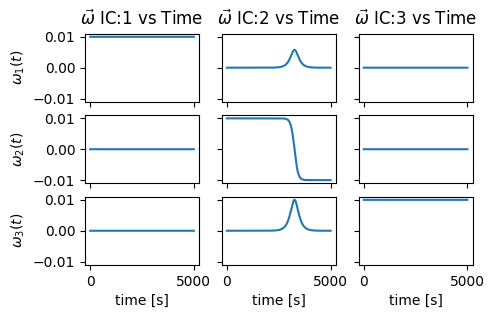

In [5]:
times = np.arange(0,5000,0.1)
I = np.array([[15,0,0],
              [0,10,0],
              [0,0,5]])
big = 0.01
small = 1e-10
w1_0 = np.array([big,small,small])
w2_0 = np.array([small,big,small])
w3_0 = np.array([small,small,big])

def EOM(x,t):
    return np.array([((I[1,1]-I[2,2])*x[1]*x[2])/I[0,0],
                     ((I[2,2]-I[0,0])*x[2]*x[0])/I[1,1],
                     ((I[0,0]-I[1,1])*x[0]*x[1])/I[2,2]])

tol = 10**-12

w1 = odeint(EOM,w1_0,times,rtol=tol,atol=tol)
w2 = odeint(EOM,w2_0,times,rtol=tol,atol=tol)
w3 = odeint(EOM,w3_0,times,rtol=tol,atol=tol)

fig,axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(5,3))

for idx in range(3):
    axes[idx,0].plot(times,w1[0:,idx],label=r"$\omega_{1}$")
    axes[idx,1].plot(times,w2[0:,idx],label=r"$\omega_{2}$")
    axes[idx,2].plot(times,w3[0:,idx],label=r"$\omega_{3}$")
    axes[0,idx].set_title(r"$\vec{\omega}$ IC:"+str(idx+1)+" vs Time")
    axes[2,idx].set_xlabel("time [s]")
axes[0,0].set_ylabel(r"$\omega_{1}(t)$")
axes[1,0].set_ylabel(r"$\omega_{2}(t)$")
axes[2,0].set_ylabel(r"$\omega_{3}(t)$")
plt.show()

#### (b) What difference do you see in the angular velocity time histories for the three sets of initial conditions? Provide an explanation based on your observations.

We see the first and third set of initial conditions result in constant angular velocities, but the second set has oscillatory motion. This is because of the MOI used in the problem. The first set of IC's is a rate about the largest MOI term, which is also known as the Minimum Energy Case. The third set of IC's is a rate about the smallest MOI term, which is also known as the Maximum Energy Case. Both of the case's are stable with no energy dissipation methods. The second method represents the separatrix of the Momentum Sphere and Kinetic Energy Ellipsoid.

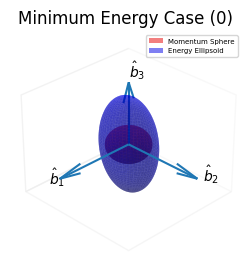

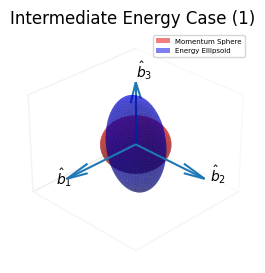

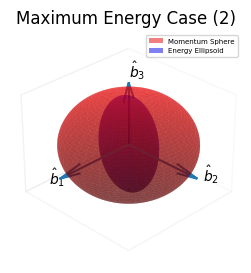

In [6]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

for idx,w in enumerate([w1,w2,w3]):
    H = np.array([I[0,0]*w[0,0],
                I[1,1]*w[0,1],
                I[2,2]*w[0,2]]).T
    H_squared = H.T@H
    T = 0.5*w[0].T@I@w[0]

    r1 = 1/H_squared
    x1 = r1 * np.outer(np.cos(u), np.sin(v))
    y1 = r1 * np.outer(np.sin(u), np.sin(v))
    z1 = r1 * np.outer(np.ones_like(u), np.cos(v))

    rx2 = 1/(2*T*I[0,0])
    ry2 = 1/(2*T*I[1,1])
    rz2 = 1/(2*T*I[2,2])
    x2 = rx2 * np.outer(np.cos(u), np.sin(v))
    y2 = ry2 * np.outer(np.sin(u), np.sin(v))
    z2 = rz2 * np.outer(np.ones_like(u), np.cos(v))

    fig = plt.figure(figsize=(5,3))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(["Minimum Energy Case",
                  "Intermediate Energy Case",
                  "Maximum Energy Case"][idx]+f" ({idx})")
    ax.plot_surface(x1, y1, z1,color="red",alpha=0.5,label="Momentum Sphere")
    ax.plot_surface(x2, y2, z2,color="blue",alpha=0.5,label="Energy Ellipsoid")
    max_radius = max(r1, rx2,ry2,rz2)

    for axis in 'xyz':
        getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
    ax.quiver(0,0,0,1.3*max_radius,0,0)
    ax.text(1.5*max_radius,0,0,r"$\hat{b}_1$")
    ax.quiver(0,0,0,0,1.3*max_radius,0)
    ax.text(0,1.4*max_radius,0,r"$\hat{b}_2$")
    ax.quiver(0,0,0,0,0,1.3*max_radius)
    ax.text(0,0,1.4*max_radius,r"$\hat{b}_3$")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.line.set_alpha(0)
    ax.yaxis.line.set_alpha(0)
    ax.zaxis.line.set_alpha(0)
    ax.view_init(elev=30,azim=45,roll=0)
    ax.legend(prop={'size':5})
    plt.show()